In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, ifft
from biosppy.signals.tools import filter_signal
from scipy.signal import blackman
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
df_X_train = pd.read_csv("data/X_train.csv", index_col="id")
df_X_train


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x17797,x17798,x17799,x17800,x17801,x17802,x17803,x17804,x17805,x17806
id,,,,,,,,,,,,,,,,,,,,,
0,-13,-9,-6,-4,0,2,6,12,23,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-34,110,249,390,527,639,721,777,823,845,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-34,-36,-37,-39,-41,-42,-44,-46,-48,-51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,292,298,303,310,320,336,354,377,405,419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,157,179,195,210,217,222,226,228,231,233,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5112,-247,-271,-285,-303,-334,-376,-413,-432,-443,-451,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5113,62,62,61,61,61,61,61,61,61,62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5114,-95,-110,-124,-131,-126,-114,-95,-67,-42,-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_X_train.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x17797,x17798,x17799,x17800,x17801,x17802,x17803,x17804,x17805,x17806
count,5117.000000,5117.000000,5117.000000,5117.000000,5117.000000,5117.000000,5117.000000,5117.000000,5117.000000,5117.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,0.045144,0.272034,0.500489,0.907172,1.108853,1.272230,1.480946,1.537424,1.842095,2.439906,...,229.0,224.0,219.0,215.0,210.0,205.0,203.0,200.0,198.0,197.0
std,364.896437,361.703219,359.962357,358.691551,357.733025,356.879344,355.131683,353.081434,349.763192,344.945237,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-5185.000000,-4589.000000,-4442.000000,-4431.000000,-4423.000000,-4416.000000,-4410.000000,-4406.000000,-4400.000000,-4387.000000,...,229.0,224.0,219.0,215.0,210.0,205.0,203.0,200.0,198.0,197.0
25%,-90.000000,-91.000000,-92.000000,-91.000000,-90.000000,-89.000000,-89.000000,-89.000000,-90.000000,-90.000000,...,229.0,224.0,219.0,215.0,210.0,205.0,203.0,200.0,198.0,197.0
50%,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,-8.000000,-8.000000,-9.000000,-9.000000,...,229.0,224.0,219.0,215.0,210.0,205.0,203.0,200.0,198.0,197.0
75%,81.000000,79.000000,78.000000,79.000000,80.000000,81.000000,83.000000,83.000000,83.000000,84.000000,...,229.0,224.0,219.0,215.0,210.0,205.0,203.0,200.0,198.0,197.0
max,4953.000000,5133.000000,5297.000000,5392.000000,5403.000000,5367.000000,5183.000000,4997.000000,4755.000000,4430.000000,...,229.0,224.0,219.0,215.0,210.0,205.0,203.0,200.0,198.0,197.0


In [4]:
df_Y_train = pd.read_csv("data/Y_train.csv", index_col="id")
df_Y_train.value_counts()

y
0    3030
2    1474
1     443
3     170
dtype: int64

In [5]:
df_X_test = pd.read_csv("data/X_test.csv", index_col="id")
df_X_test


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x17797,x17798,x17799,x17800,x17801,x17802,x17803,x17804,x17805,x17806
id,,,,,,,,,,,,,,,,,,,,,
0,73,73,73,72,70,68,66,63,60,56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-100,-97,-95,-94,-94,-93,-93,-93,-92,-92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-571,-656,-756,-833,-893,-952,-1000,-1061,-1112,-1128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-44,-41,-39,-37,-35,-34,-33,-32,-32,-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-68,-70,-73,-76,-78,-80,-81,-82,-83,-87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3406,8,8,9,11,13,13,13,13,13,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3407,104,73,42,17,0,-12,-17,-20,-24,-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3408,-42,-38,-34,-30,-27,-24,-21,-18,-15,-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_X_test.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x17797,x17798,x17799,x17800,x17801,x17802,x17803,x17804,x17805,x17806
count,3411.000000,3411.000000,3411.000000,3411.000000,3411.000000,3411.000000,3411.000000,3411.000000,3411.000000,3411.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,-2.214600,-2.146878,-1.894166,-1.564057,-1.269129,-0.922897,-0.952507,-1.161829,-1.238933,-1.178833,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,351.648184,353.390057,356.852853,361.016747,364.623936,366.976245,367.934085,367.397954,365.678530,364.140444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-6557.000000,-6324.000000,-6096.000000,-5889.000000,-5686.000000,-5468.000000,-5240.000000,-5014.000000,-4802.000000,-4652.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,-90.500000,-92.000000,-92.000000,-91.000000,-89.000000,-88.000000,-89.000000,-90.000000,-90.000000,-89.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,-10.000000,-10.000000,-9.000000,-10.000000,-9.000000,-10.000000,-11.000000,-11.000000,-12.000000,-13.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,84.500000,87.000000,88.000000,87.000000,85.000000,85.500000,84.500000,86.000000,87.000000,86.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2742.000000,2623.000000,2478.000000,2318.000000,2159.000000,2143.000000,2233.000000,2307.000000,2368.000000,2487.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# check for missing values in the middle of the time series 
"""
df = df_X_test

# Check if all signals starts at x0
for id in df.index:
    a = df[df.index==id].dropna(axis=1).columns[0] # First non-NaN column
    if a != 'x0':
        print(f'Warning! Id : {id}, Starting point : {a}')
# --> check ok for both train and test sets!

# Check if there are NaN values in middle of signal
for id in df.index:
    a = df[df.index==id].count().sum() # Number of non-Nan values
    b = df[df.index==id].bfill(axis=1).count().sum() # End point (number of non-NaN once we have backward-filled the series)
    if a!=b:
        print(f'Warning! Id : {id}, End point : {b}, Number of non-NaN : {a}')
"""
# --> check ok for both train and test sets!

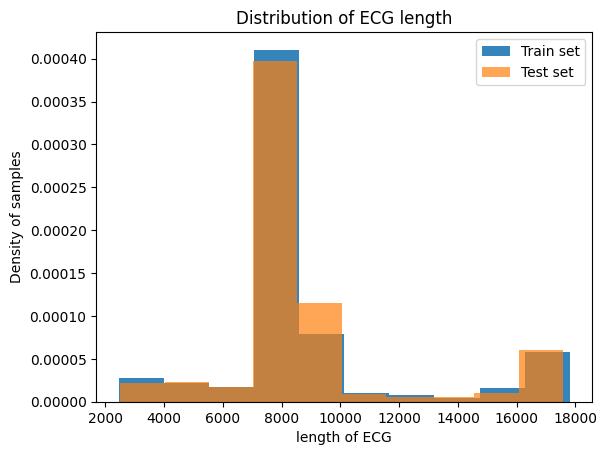

In [8]:
# TODO : check for missing values in the middle of the time series 
# --> done : no missing values in middle of time series !

plt.hist(df_X_train.count(axis=1), density=True, label='Train set', alpha=0.9)
plt.hist(df_X_test.count(axis=1), density=True, label='Test set', alpha=0.7)
plt.title('Distribution of ECG length')
plt.xlabel('length of ECG')
plt.ylabel('Density of samples')
plt.legend()
plt.show()

# question : seems there are 2 main clusters, is the length of the ECG signal relevant ? 
#               E.g. doctors recorded longer ECG signals for suspicious cases ?

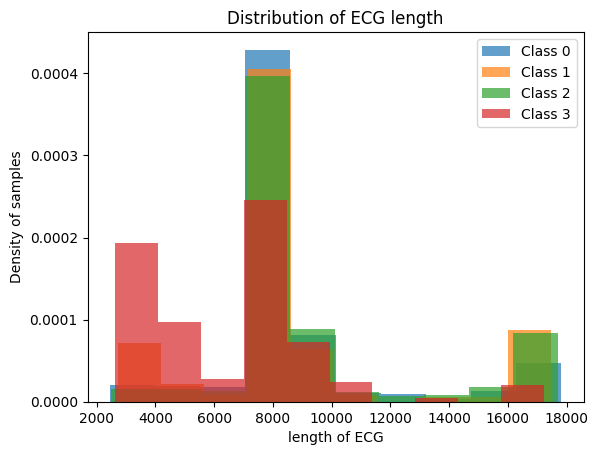

In [9]:
for i in range(4):
    plt.hist(df_X_train[df_Y_train["y"]==i].count(axis=1), 
             density=True, label=f'Class {i}', alpha=0.7)
plt.title('Distribution of ECG length')
plt.xlabel('length of ECG')
plt.ylabel('Density of samples')
plt.legend()
plt.show()  

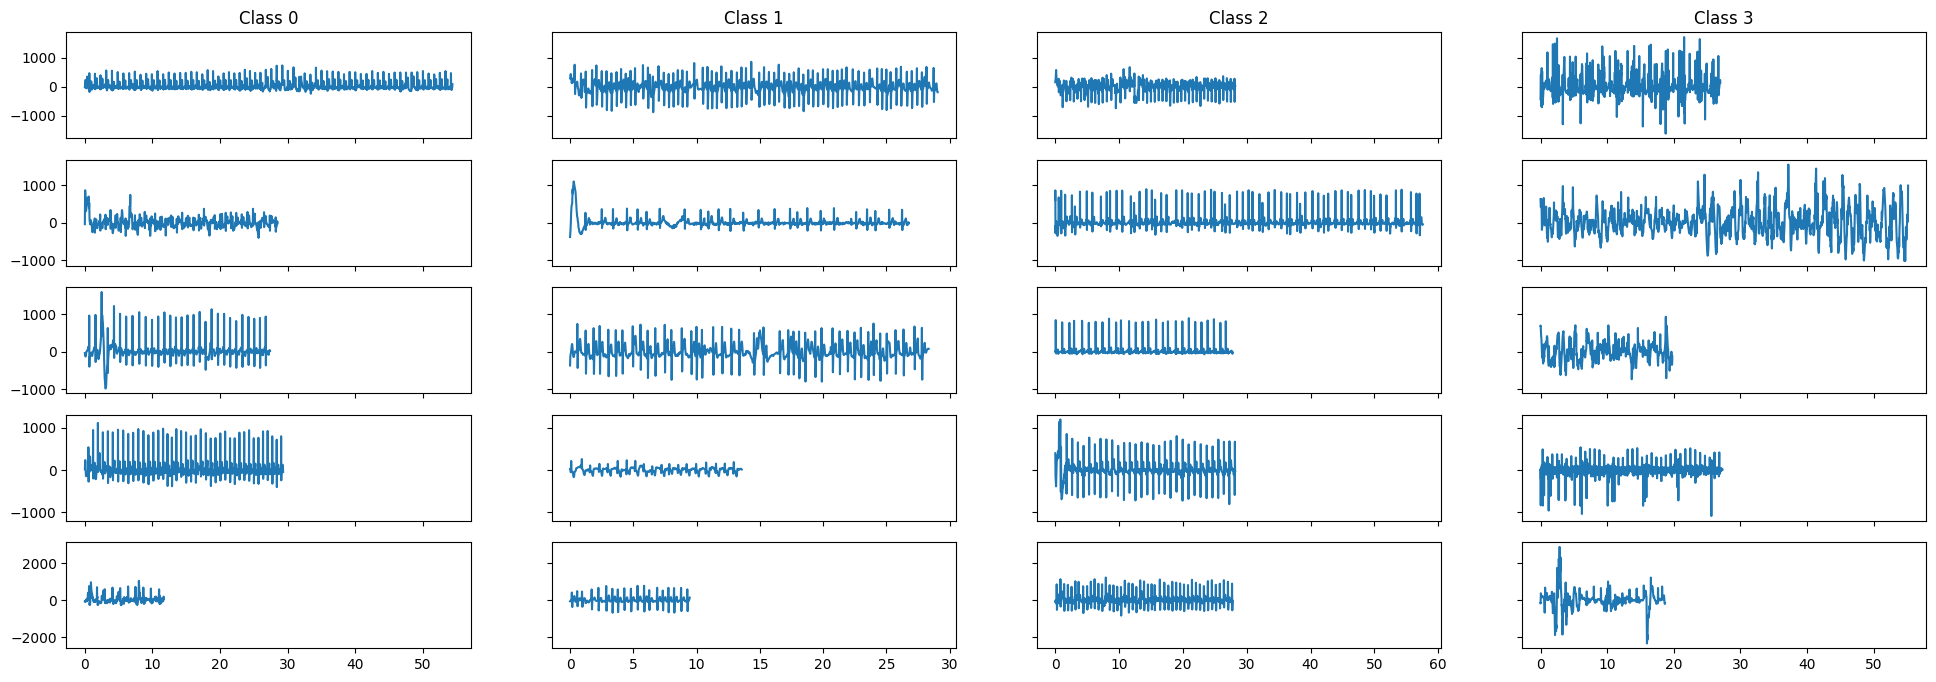

In [10]:
fig, axs = plt.subplots(5, 4, sharey='row', sharex='col', figsize=(24,8))

for i in range(4):
    for j in range(5):
        axs[j,i].plot(np.arange(df_X_train.shape[1])/300.0, df_X_train[df_Y_train["y"]==i].iloc[j,:])

cols = ['Class {}'.format(col) for col in range(4)]
for ax, col in zip(axs[0], cols):
    ax.set_title(col)
plt.show()  

3030

In [11]:
feat = pd.DataFrame({
            "class" : df_Y_train["y"],
            "min" : df_X_train.min(axis=1),
            "med" : df_X_train.median(axis=1),
            "avg" : df_X_train.mean(axis=1),
            "max" : df_X_train.max(axis=1),
            "std" : df_X_train.std(axis=1),
            "len" : df_X_train.count(axis=1)},
        index = df_X_train.index)



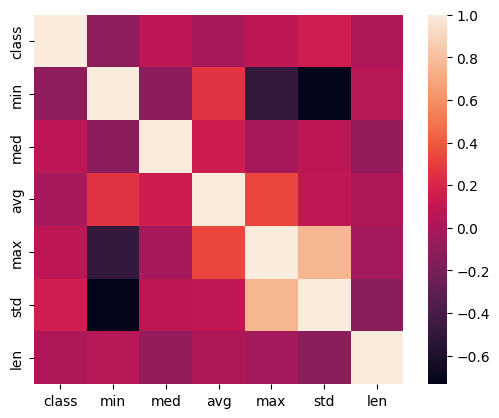

In [12]:
corr = feat.corr()
sns.heatmap(corr, square=True)
plt.show()

id
3273    197.0
Name: x17806, dtype: float64


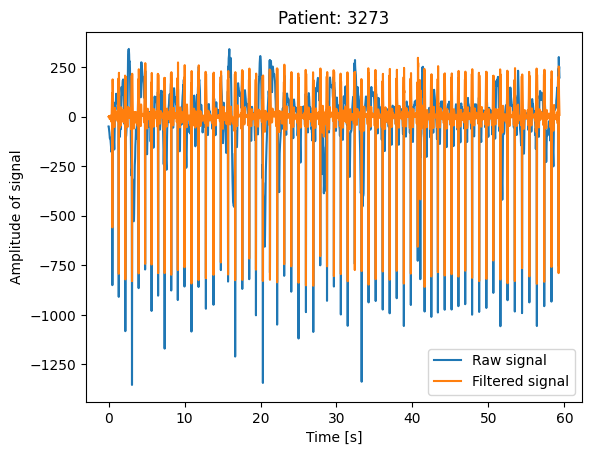

In [13]:
print(df_X_train["x17806"].dropna())

id = 3273

signal = df_X_train.iloc[id,:]

freq = 300.0 #Hz

order = int(0.3*freq)
filter_bandwidth = [3, 45]

signal_flt, _, _ = filter_signal(signal=signal,
                                     ftype='FIR',
                                     band='bandpass',
                                     order=order,
                                     frequency=filter_bandwidth,
                                     sampling_rate=freq)

plt.plot(np.arange(df_X_train.shape[1])/300.0, signal, label = "Raw signal")
plt.plot(np.arange(df_X_train.shape[1])/300.0, signal_flt, label = "Filtered signal")
plt.title(f'Patient: {id}')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude of signal')
plt.legend()
plt.show()

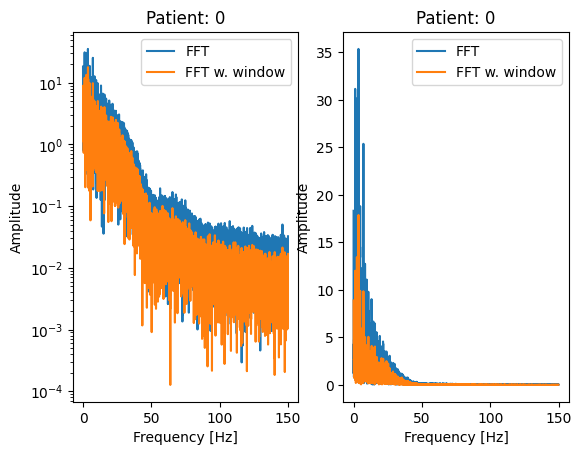

In [14]:
id = 0

y=df_X_train.iloc[id,:].dropna().to_numpy()
N = len(y)
T = 1.0/300.0
x = np.linspace(0.0, N*T, N, endpoint=False)
yf = fft(y)
w = blackman(N)
ywf = fft(y*w)
xf = fftfreq(N, T)[:N//2]

plt.subplot(121)
plt.semilogy(xf, 2.0/N * np.abs(yf[0:N//2]), label="FFT")
plt.semilogy(xf, 2.0/N * np.abs(ywf[0:N//2]), label="FFT w. window")
plt.title(f'Patient: {id}')
plt.xlabel('Frequency [Hz]')
#plt.xlim([0,10])
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(122)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]), label="FFT")
plt.plot(xf, 2.0/N * np.abs(ywf[0:N//2]), label="FFT w. window")
plt.title(f'Patient: {id}')
plt.xlabel('Frequency [Hz]')
#plt.xlim([0,10])
plt.ylabel('Amplitude')
plt.legend()


plt.show()

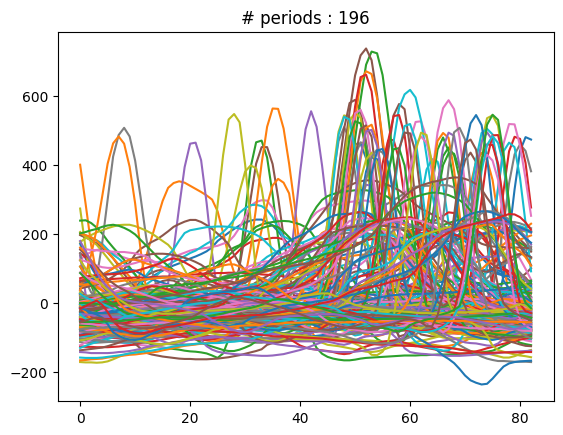

In [15]:
fmax = xf[(2.0/N * np.abs(ywf[0:N//2])).argmax()]
t_rep = 1.0/fmax
i_rep = round(t_rep*300)
for n_period in range(N//i_rep):
    plt.plot(range(i_rep), y[n_period*i_rep:(n_period+1)*i_rep], label=f'Period {n_period}') 
plt.title(f'# periods : {N//i_rep}')
plt.show()

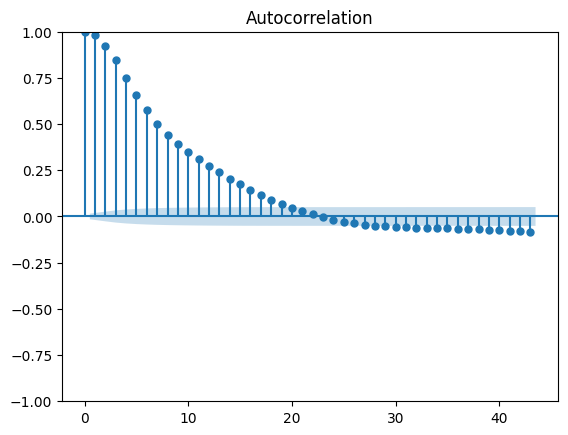

In [16]:
id = 0

y = df_X_train.iloc[id,:].dropna()
N = y.count()
T = 1.0/300.0
x = np.linspace(0.0, N*T, N, endpoint=False)
data = pd.DataFrame({'x':x, 'y':y}).set_index(['x'])
plot_acf(data)
plt.show()